<a href="https://colab.research.google.com/github/Snehi1/Python_projects/blob/main/Calories_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandasql import sqldf

In [ ]:
calories_df=pd.read_csv("/content/calories.csv")
exercise_df=pd.read_csv("/content/exercise.csv")

In [ ]:
calories_df.shape


(15000, 2)

In [ ]:
exercise_df.shape

(15000, 8)

In [ ]:
calories_df.info

<bound method DataFrame.info of         User_ID  Calories
0      14733363     231.0
1      14861698      66.0
2      11179863      26.0
3      16180408      71.0
4      17771927      35.0
...         ...       ...
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

[15000 rows x 2 columns]>

In [ ]:
exercise_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [ ]:
sqldf("select * from exercise_df order by height asc limit 5",globals())

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,17172665,female,63,123.0,40.0,9.0,97.0,39.9
1,18699424,female,30,126.0,39.0,25.0,104.0,40.7
2,11581936,female,58,127.0,40.0,29.0,102.0,40.8
3,13721168,female,35,132.0,38.0,30.0,112.0,40.5
4,11352685,female,20,132.0,41.0,5.0,85.0,39.3


In [ ]:
sqldf("select * from exercise_df as e left join calories_df as c  on e.User_ID = c.User_ID   order by height asc limit 5 ",globals())


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,17172665,female,63,123.0,40.0,9.0,97.0,39.9,17172665,55.0
1,18699424,female,30,126.0,39.0,25.0,104.0,40.7,18699424,156.0
2,11581936,female,58,127.0,40.0,29.0,102.0,40.8,11581936,189.0
3,13721168,female,35,132.0,38.0,30.0,112.0,40.5,13721168,216.0
4,11352685,female,20,132.0,41.0,5.0,85.0,39.3,11352685,20.0


Merging of 2 table.

In [ ]:
df=pd.merge(exercise_df,calories_df,on='User_ID')
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
user_id=df['User_ID']
user_id.head(5)
df=df.drop(axis=1,columns='User_ID')
df.shape
df.head(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


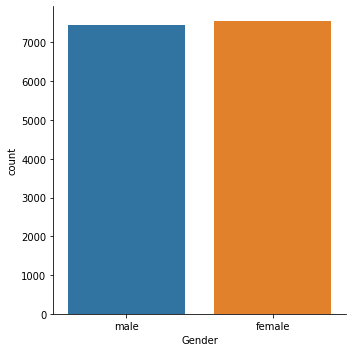

In [ ]:
sns.catplot(x='Gender',kind='count',data=df)

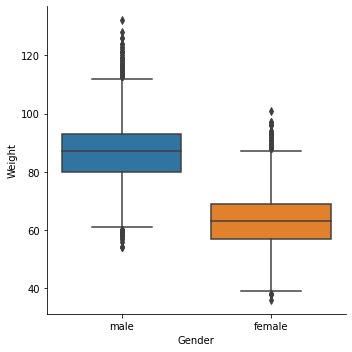

In [ ]:
sns.catplot(x='Gender',y='Weight',kind='box',data=df)

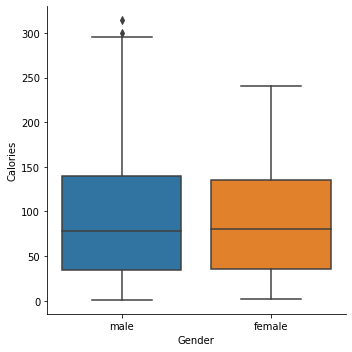

In [ ]:
sns.catplot(x='Gender',y='Calories',kind='box',data=df)

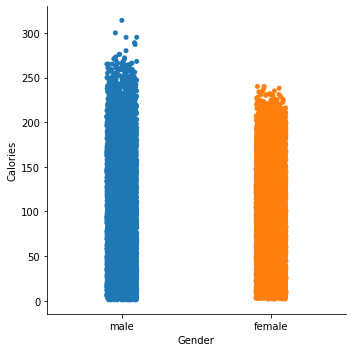

In [ ]:
sns.catplot(x='Gender',y='Calories',data=df)

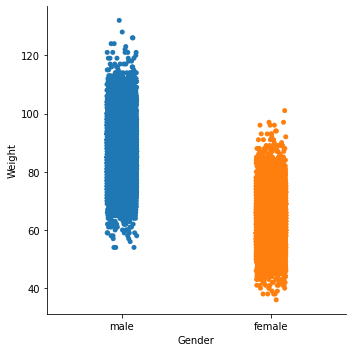

In [ ]:
sns.catplot(x='Gender',y='Weight',data=df)

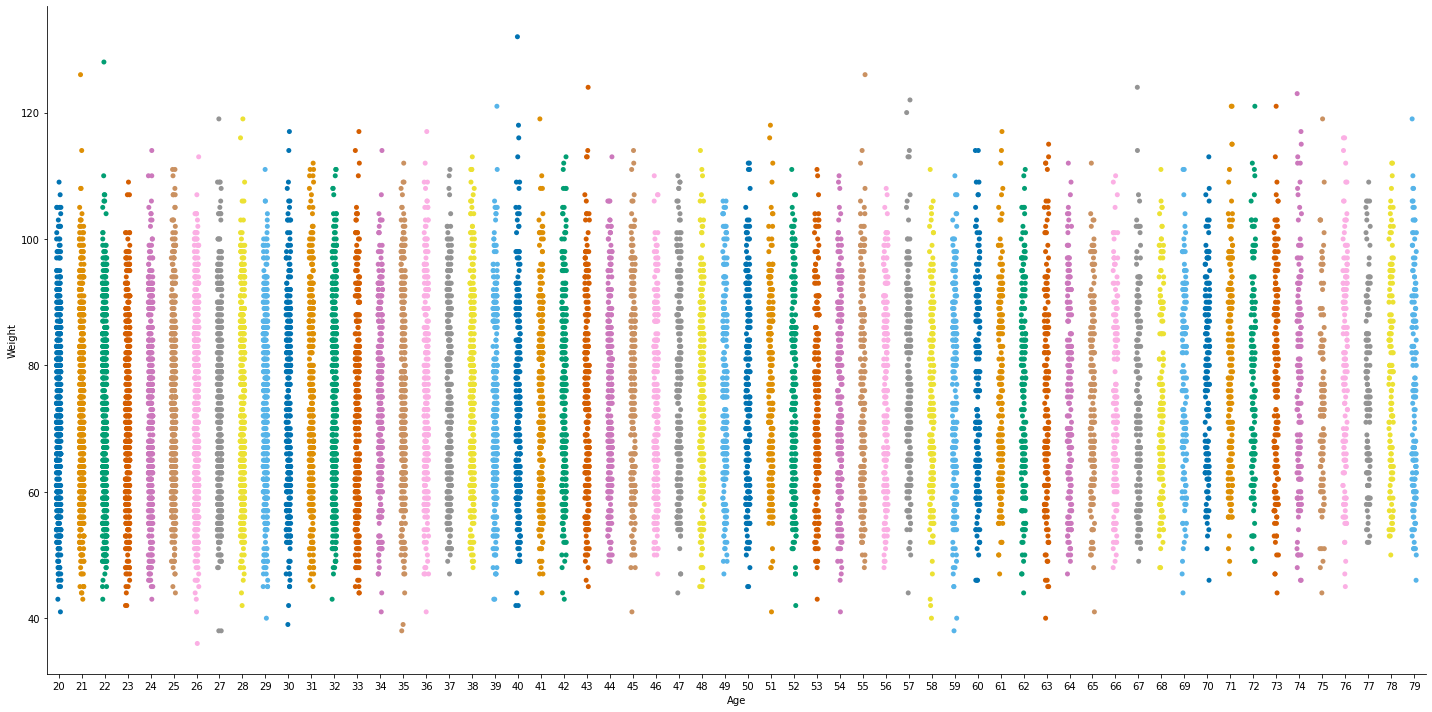

In [ ]:
sns.catplot(x='Age',y='Weight',data=df,height=10,aspect=2,palette='colorblind')

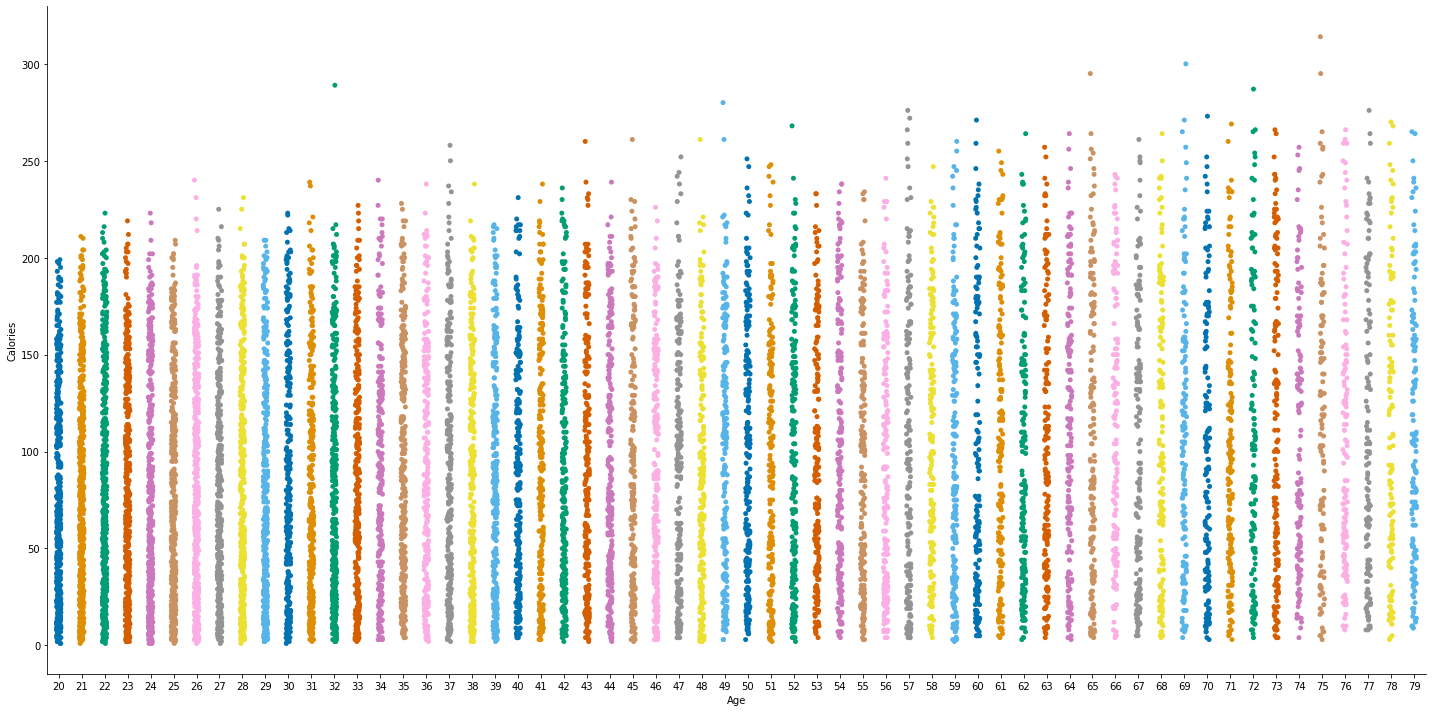

In [ ]:
sns.catplot(x='Age',y='Calories',data=df,height=10,aspect=2,palette='colorblind')

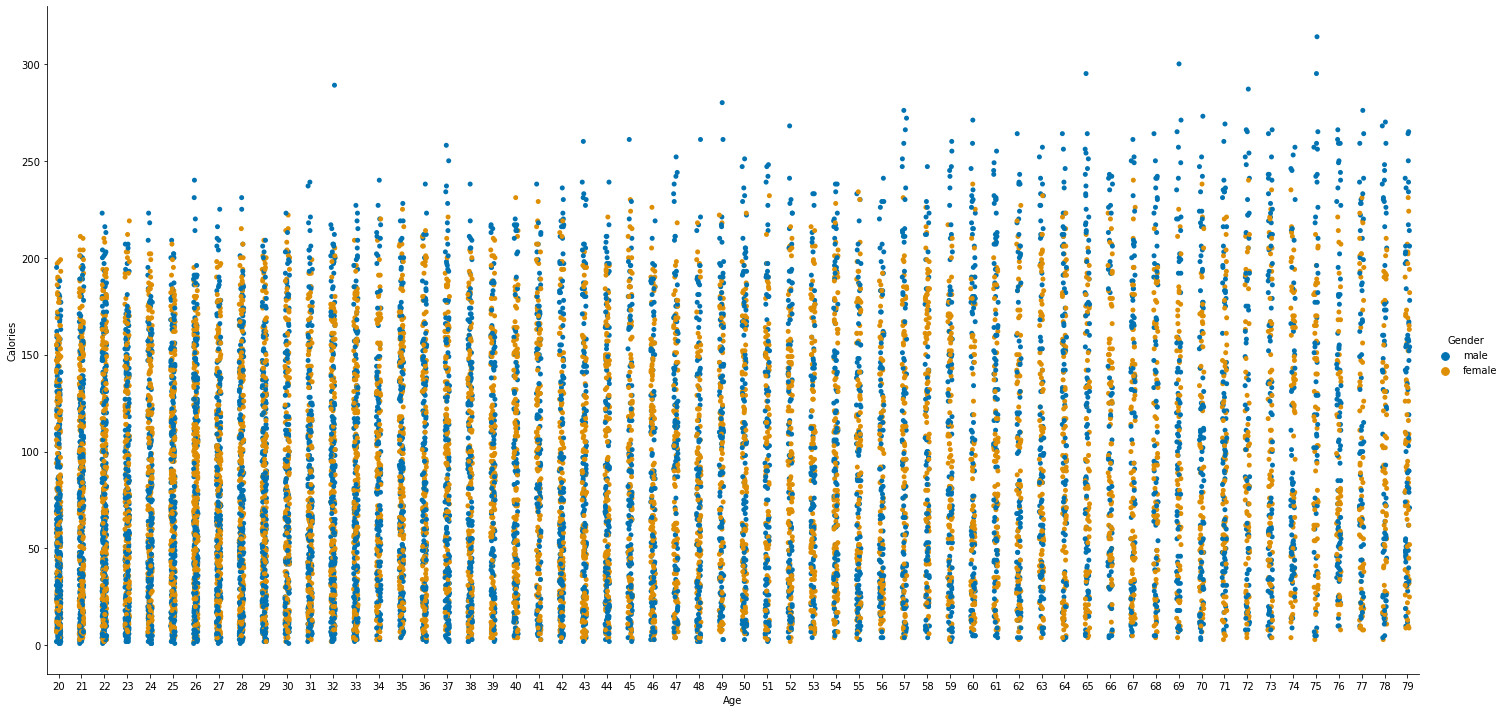

In [ ]:
sns.catplot(x='Age',y='Calories',hue='Gender',data=df,height=10,aspect=2,palette='colorblind')

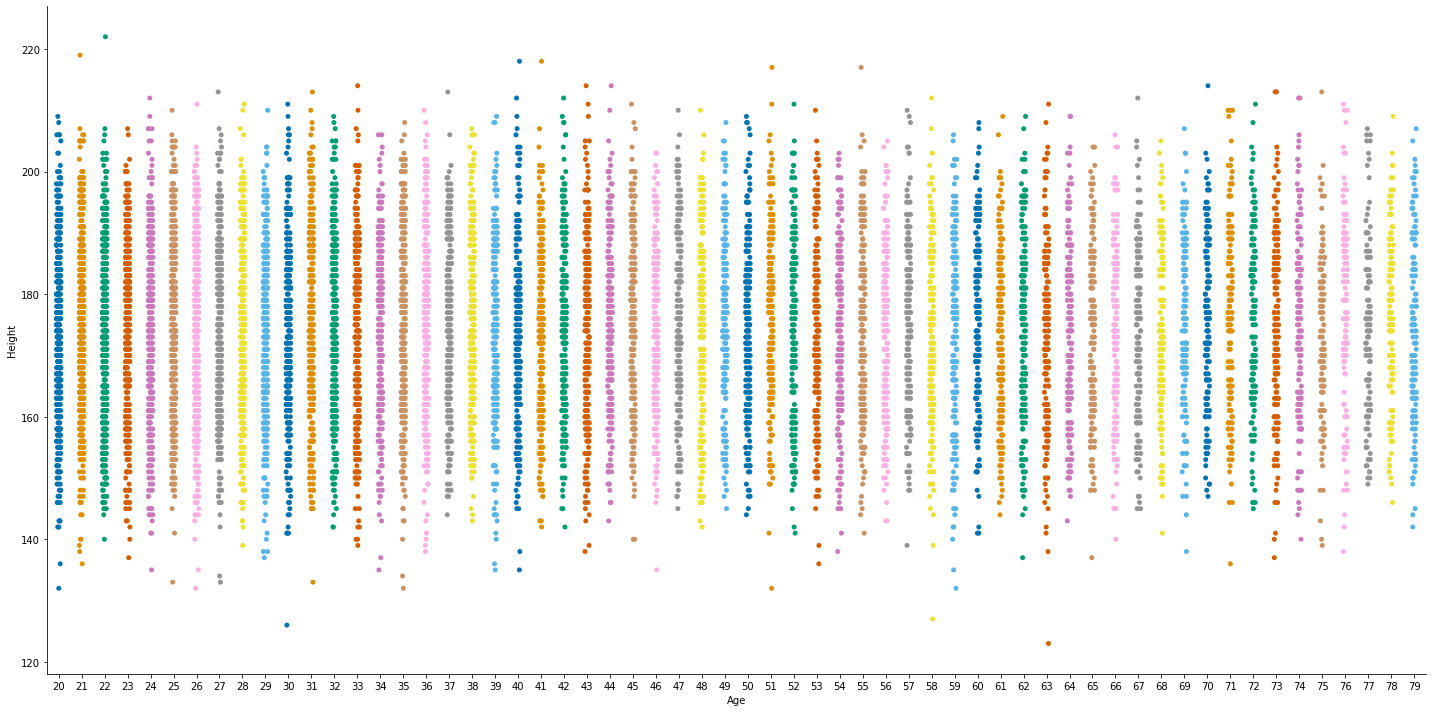

In [ ]:
sns.catplot(x='Age',y='Height',data=df,height=10,aspect=2,palette='colorblind')

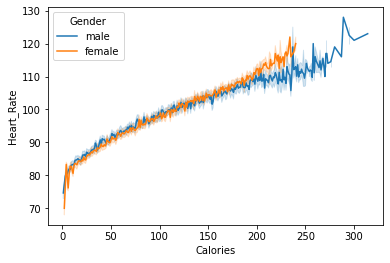

In [ ]:
sns.lineplot(x='Calories',y='Heart_Rate',hue='Gender',data=df)

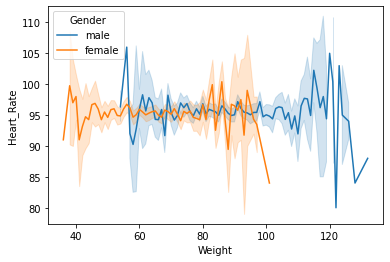

In [ ]:
sns.lineplot(x='Weight',y='Heart_Rate',hue='Gender',data=df)

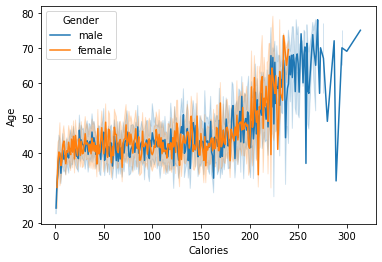

In [ ]:
sns.lineplot(x='Calories',y='Age',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


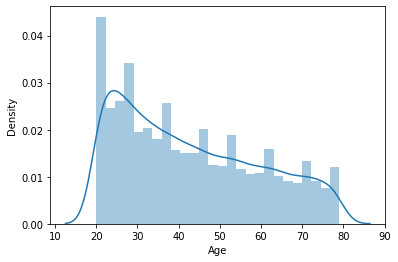

In [ ]:
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


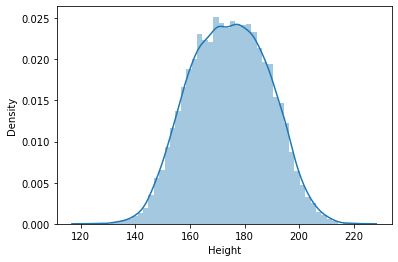

In [ ]:
sns.distplot(df['Height'])

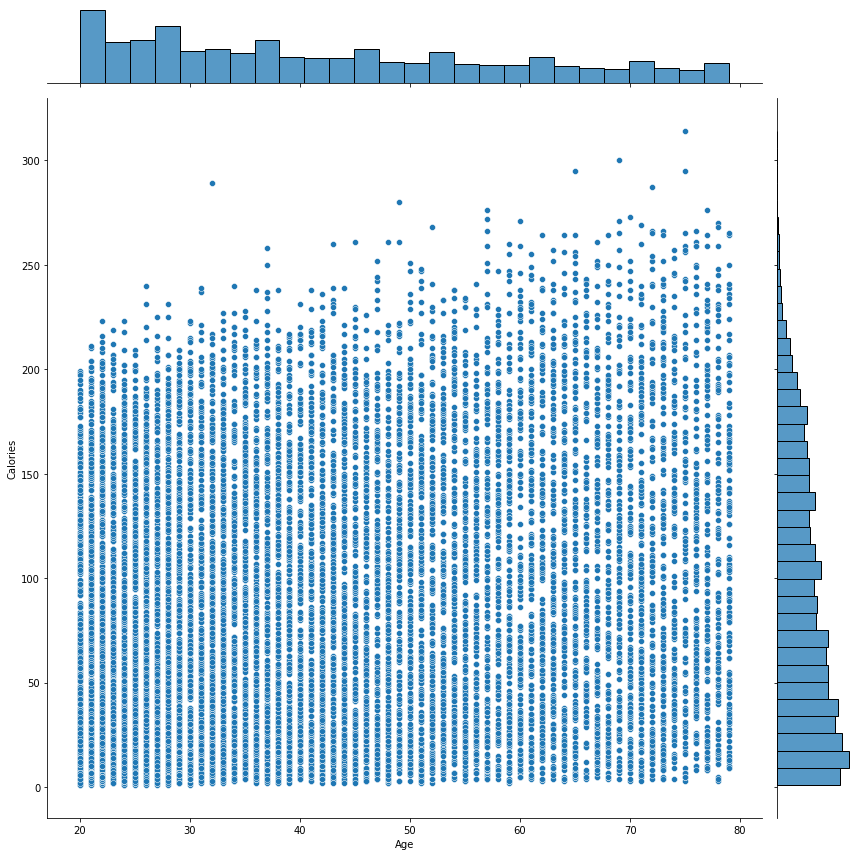

In [ ]:
sns.jointplot(x='Age', y='Calories', data=df,height=12,ratio=8)

In [ ]:
def plot_col_vs_calories(col):
  fig,(ax1,ax2)=plt.subplot()

In [ ]:
def plot_numeric_col(col_name):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
    fig.suptitle(f'Plots for "{col_name}"')
    sns.distplot(df[col_name], ax=ax1)
    ax1.set_title(f'Distribution of {col_name}')
    sns.lineplot(x=col_name, y='Calories',hue='Gender', data=df, ax=ax2)
    ax2.set_title(f'{col_name} vs Calories')
    plt.show()

In [ ]:
def get_numeric_cols():
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    print(num_cols)
    del num_cols[-1]
    return num_cols

In [ ]:
get_numeric_cols()

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


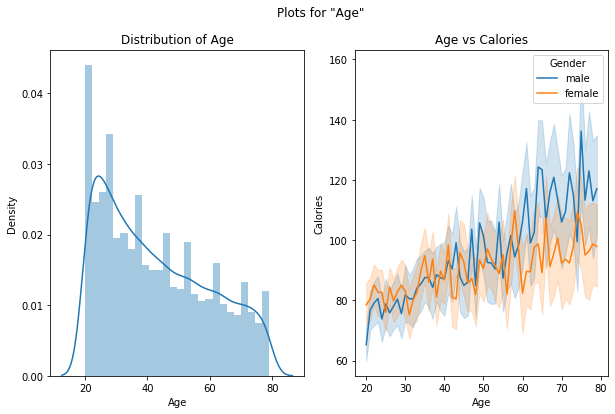

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


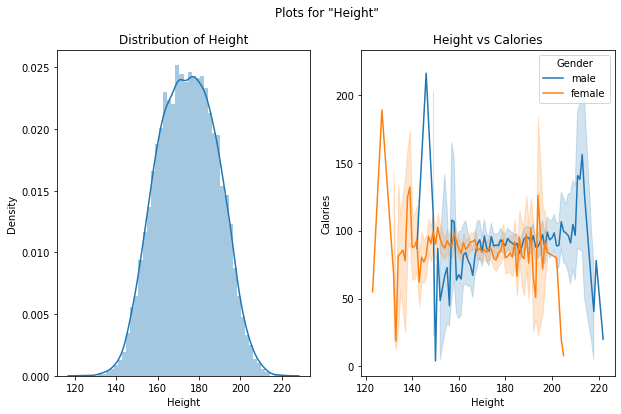

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


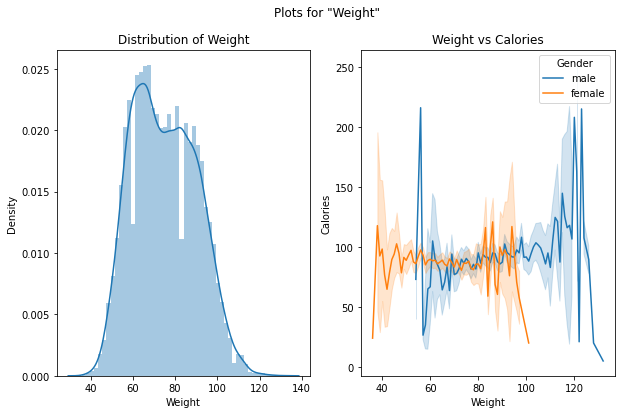

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


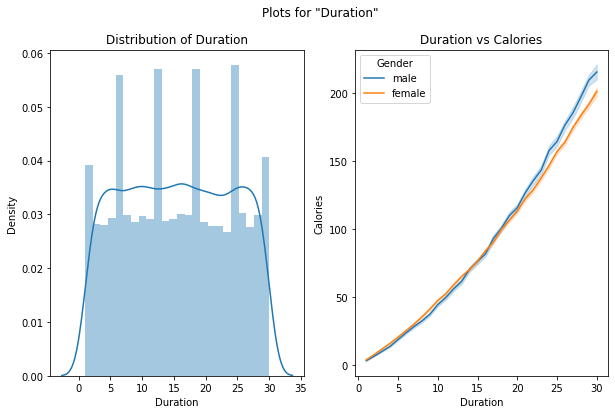

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


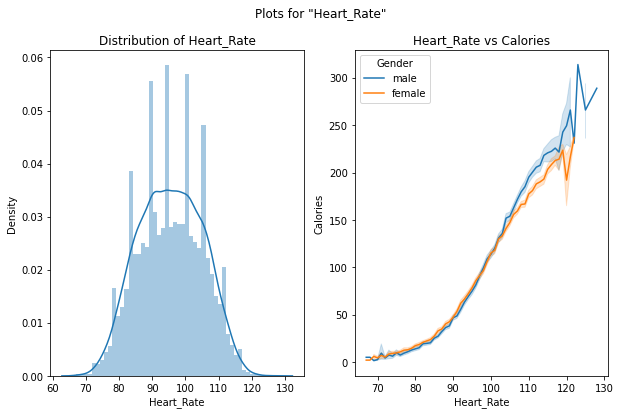

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


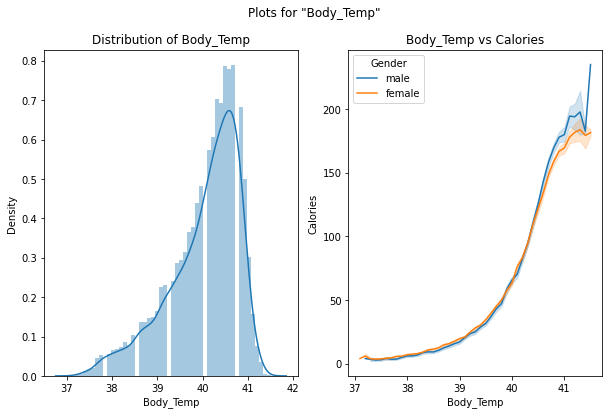

In [ ]:
for col in get_numeric_cols():
    plot_numeric_col(col)

In [ ]:
def plot_numeric_col_reg_plot(col_name):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
    fig.suptitle(f'Plots for "{col_name}"')
    sns.distplot(df[col_name], ax=ax1)
    ax1.set_title(f'Distribution of {col_name}')
    sns.regplot(x=col_name, y='Calories', data=df, ax=ax2)
    ax2.set_title(f'{col_name} vs Calories')
    plt.show()

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


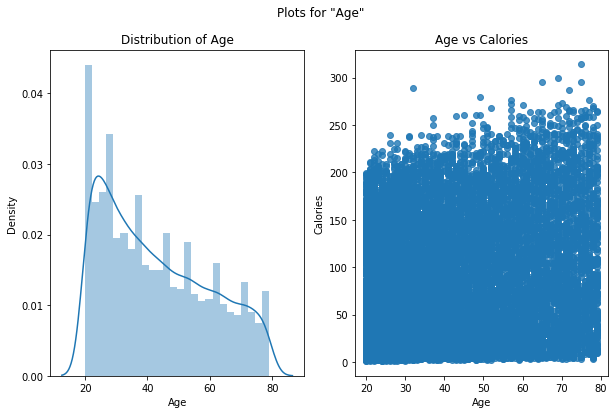

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


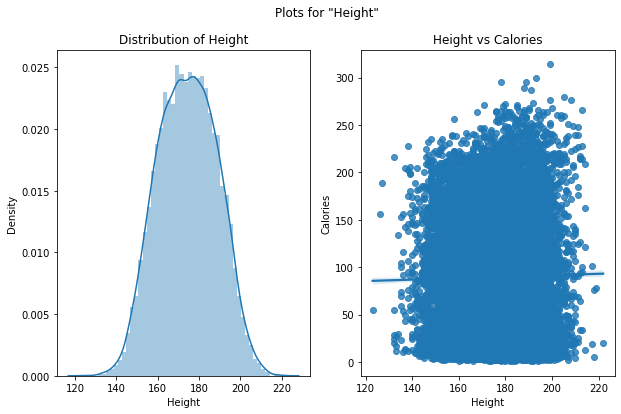

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


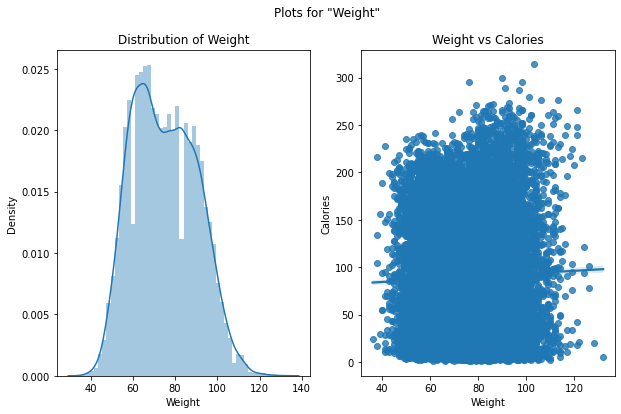

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


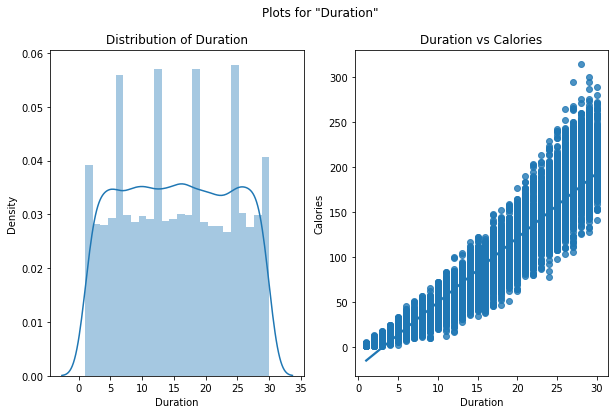

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


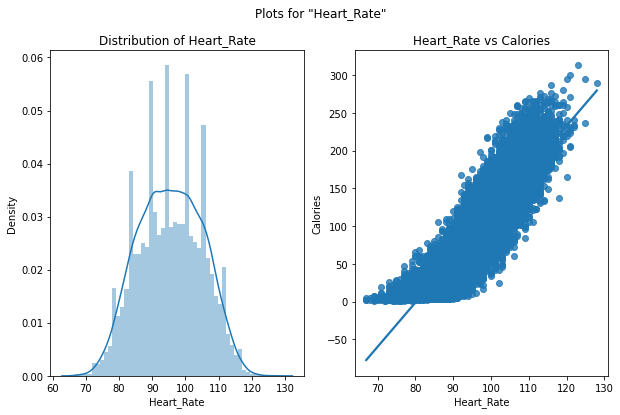

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


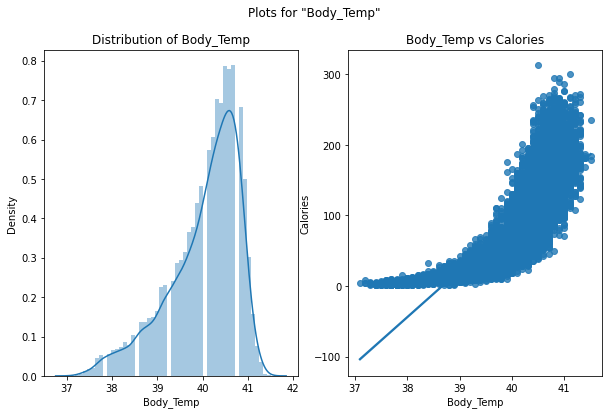

In [ ]:
for col in get_numeric_cols():
    plot_numeric_col_reg_plot(col)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X= pd.DataFrame( df,columns=['Duration'])
y = df['Calories']
X.head(5)


,Duration
0,29.0
1,14.0
2,5.0
3,13.0
4,10.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(12000, 1) (3000, 1)
(12000,) (3000,)


In [ ]:
lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)

y_pred = lr_1.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print('Root Mean Squared Error: {}'.format(np.sqrt(mse)))

Root Mean Squared Error: 18.575279010157583


In [ ]:
r2_score(y_test,y_pred)

0.914504752724938

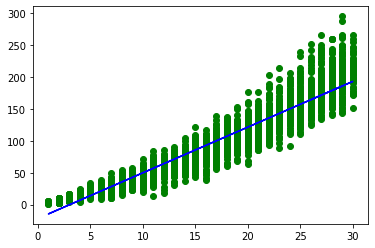

In [ ]:
plt.scatter(X_test, y_test, color='green') 
plt.plot(X_test, y_pred, color='blue') 
plt.show()

In [ ]:
X_2= pd.DataFrame( df,columns=['Duration','Heart_Rate','Body_Temp'])
y_2 = df['Calories']
X_2.head(5)


,Duration,Heart_Rate,Body_Temp
0,29.0,105.0,40.8
1,14.0,94.0,40.3
2,5.0,88.0,38.7
3,13.0,100.0,40.5
4,10.0,81.0,39.8


In [ ]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

print(X_2_train.shape, X_2_test.shape)
print(y_2_train.shape, y_2_test.shape)

(12000, 3) (3000, 3)
(12000,) (3000,)


In [ ]:
mr=LinearRegression()
mr.fit(X_2_train,y_2_train)

LinearRegression()

In [ ]:
y_2_pred=mr.predict(X_2_test)

In [ ]:
mrs2=mean_squared_error(y_2_test,y_2_pred)
mrs2

216.0823568207082

In [ ]:
r2_score(y_test,y_2_pred)

0.9464584932015652

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(X_train)
linreg=LinearRegression()
linreg.fit(x_poly,y_train)



LinearRegression()

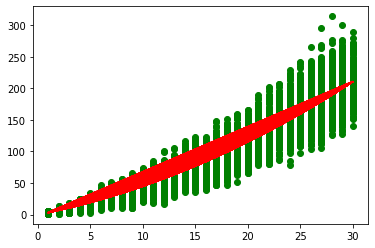

In [ ]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,linreg.predict(poly_reg.fit_transform(X_train)),color='red')
plt.show()


In [ ]:
poly_reg_y_predict=linreg.predict(poly_reg.fit_transform(X_test.to_numpy().reshape(-1,1)))
poly_reg_y_predict

array([169.36543036, 199.77659621,  50.99470661, ..., 115.28011976,
        19.36613301, 199.77659621])

In [ ]:
poly_mse=mean_squared_error(y_test,poly_reg_y_predict)
poly_mse

274.87203063757653

In [ ]:
r2_score(y_test,poly_reg_y_predict)

0.9318914190236609

In [ ]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
scy=StandardScaler()
x_scaled=scx.fit_transform(X_train)

y_scaled=scy.fit_transform(y_train.to_numpy().reshape(-1,1))
print(x_scaled[0:5])
print(y_scaled[0:5])

[[-1.02188864]
 [ 1.26666332]
 [-0.41963812]
 [-0.78098843]
 [-1.26278885]]
[[-1.15954093]
 [ 1.25297221]
 [-0.78962225]
 [-0.88612278]
 [-1.06304041]]


support vector regreession

In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf")
svr.fit(x_scaled,y_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred_svr=svr.predict(scx.transform(X_test))
y_pred_svr_orgn=scy.inverse_transform(y_pred_svr.reshape(-1,1))
#y_pred_svr_orgn=scy.inverse_transform(y_pred_svr)
print(r2_score(y_test,y_pred_svr_orgn))

0.9309359018967066


In [ ]:
x_test_scaled=scx.fit_transform(X_test)

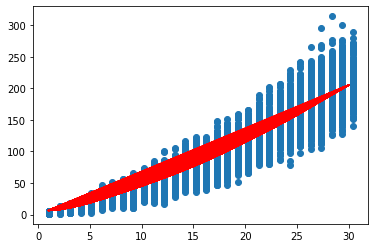

In [ ]:
plt.scatter(scx.inverse_transform(x_scaled),scy.inverse_transform(y_scaled))
plt.plot(scx.inverse_transform(x_test_scaled),y_pred_svr_orgn,color='red')

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
preds = dt.predict(X_test)
r2_score(y_test, preds)

0.931790696825987

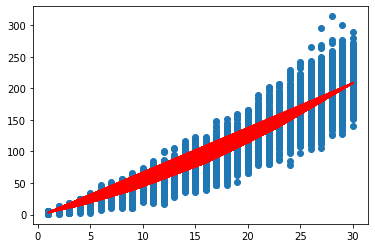

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_test,preds,color='red')

RANDOM FOREST REGGRESSOR.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=50,random_state=42)
rfr.fit(X_train,y_train)
pred_rfr=rfr.predict(X_test)
print(r2_score(y_test,pred_rfr))

0.9318113603359307


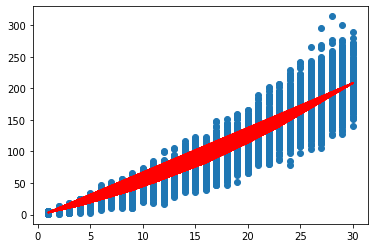

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_test,pred_rfr,color='red')